In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!mkdir '/content/gdrive/MyDrive/Colab Notebooks/covid19'

In [ ]:
cd '/content/gdrive/MyDrive/Colab Notebooks/covid19'

In [6]:
import pandas as pd
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')

In [9]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91042,91119,91189,91251,91317,91358,91378,91418

In [7]:
idx_korea = (confirmed_df['Country/Region']=='Korea, South')
confirmed_korea_df = confirmed_df[idx_korea]

In [8]:
confirmed_korea_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,...,115926,116661,117458,118243,118887,119387,119898,120673,121351,122007,122634,123240,123728,124269,124945,125519,126044,126745,127309,127772,128283,128918,129633,130380,131061,131671,132290,132818,133471,134117,134678,135344,135929,136467,136983,137682,138311,138898,139431,139910


In [10]:
import matplotlib.pyplot as plt
import numpy as np

confirmed_korea_np = np.array(confirmed_korea_df)
confirmed_korea_np = confirmed_korea_np[:,5:]

In [11]:
confirmed_korea_np.shape

(1, 493)

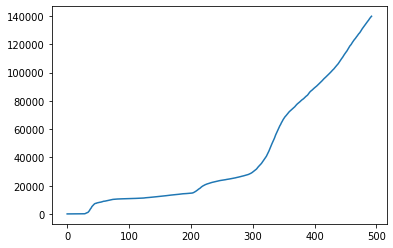

In [12]:
plt.plot(confirmed_korea_np[0, :])

([<matplotlib.axis.XTick at 0x7fb413272610>,
 [Text(0, 0, '1/22/20'),
  Text(0, 0, '5/1/20'),
  Text(0, 0, '8/9/20'),
  Text(0, 0, '11/17/20'),
  Text(0, 0, '2/25/21')])

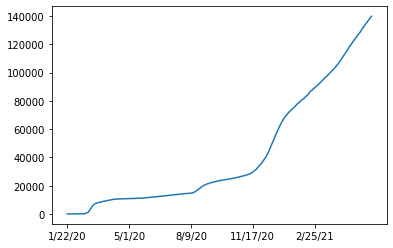

In [14]:
#가로축에 눈금 표시
plt.plot(confirmed_korea_np[0,:]) #확진자 그래프 그리기

label_x = confirmed_korea_df.columns.values[4:] #DataFrame에서 인덱스 가져오기

sel_ids = range(0,len(label_x),100) #눈금을 표시할 위치 선택
plt.xticks(sel_ids,labels=label_x[sel_ids]) #눈금표시

In [15]:
#누적 사망자 수 가져오기
idx_korea = (deaths_df['Country/Region']=='Korea, South')
deaths_korea_df = deaths_df[idx_korea] #한국의 데이터만 추출

deaths_korea_np = np.array(deaths_korea_df) #numpy 배열로 변환
deaths_korea_np = deaths_korea_np[:,4:] #0-3번 열 삭제

#누적 회복자 수 가져오기
idx_korea = (recovered_df['Country/Region']=='Korea, South')
recovered_korea_df = recovered_df[idx_korea] #한국의 데이터만 추출

recovered_korea_np = np.array(recovered_korea_df) #numpy 배열로 변환
recovered_korea_np = recovered_korea_np[:,4:] #0-3번 열 삭제

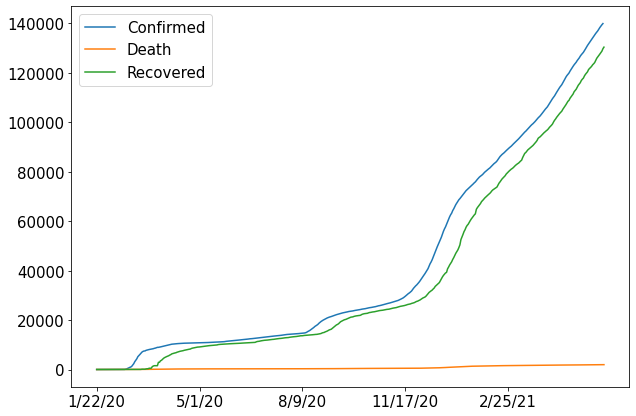

In [32]:
plt.figure(figsize=(10,7))
plt.plot(confirmed_korea_np[0,:]) #확진자 그래프 그리기
plt.plot(deaths_korea_np[0,:]) #사망자 그래프 그리기
plt.plot(recovered_korea_np[0,:]) #회복자 그래프 그리기

label_x = confirmed_korea_df.columns.values[4:] #DataFrame에서 인덱스 가져오기
sel_ids = range(0,len(label_x),100) #눈금을 표시할 위치 선택

plt.xticks(sel_ids,labels=label_x[sel_ids], fontsize=15) #x축 눈금 표시
plt.yticks(fontsize=15) #y축 눈금 표시
plt.legend(['Confirmed','Death','Recovered'], fontsize=15) #범례 표시

In [ ]:
plt.figure(figsize=(10,7))
recovered2confirmed_ratio = deaths_korea_np[0,:]/confirmed_korea_np[0,:] #여기서 문제가 생긴다

plt.plot(recovered2confirmed_ratio) #확진자 그래프 그리기

label_x = confirmed_korea_df.columns.values[4:] #DataFrame에서 인덱스 가져오기

sel_ids = range(0,len(label_x),100) #눈금을 표시할 위치 선택
plt.xticks(sel_ids,labels=label_x[sel_ids],fontsize=15) #x축 눈금 표시
plt.yticks(fontsize=15) #y축 눈금 표시

In [23]:
idx_max = np.argmax(recovered2confirmed_ratio)

print(f'사망자/확진자 비율이 최대인 일자는 : {label_x[idx_max]} 이며')
print(f'해당 일자의 값은 {recovered2confirmed_ratio[idx_max]:.3f}입니다')

사망자/확진자 비율이 최대인 일자는 : 5/28/21 이며
해당 일자의 값은 139910.000입니다
